<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

### Paso 2: Preparación de los datos – Respuestas a las preguntas

#### 1. ¿Qué columnas fueron cambiadas de tipo y por qué?

Se realizaron los siguientes cambios de tipo de datos:

- **`user_score`**: originalmente era de tipo `object` (texto) debido a la presencia de valores como `'tbd'` (to be determined). Se reemplazaron por `NaN` y se convirtió a tipo `float`, ya que representa una puntuación numérica.
- **`year_of_release`**: fue convertido a numérico (`float`) para permitir análisis por año, ya que algunos valores estaban en formato incorrecto.

Estos cambios fueron necesarios para permitir operaciones estadísticas y de agrupación.

---

#### 2. ¿Qué columnas tienen valores ausentes?

Las siguientes columnas presentan valores nulos:

- `name`
- `year_of_release`
- `genre`
- `critic_score`
- `user_score`
- `rating`

---

#### 3. ¿Por qué crees que los valores están ausentes?

Los valores ausentes pueden explicarse por varias razones:

- **Juegos antiguos**: muchos títulos lanzados antes de 2000 no cuentan con reseñas de críticos o puntuaciones de usuarios porque esos sistemas aún no eran comunes.
- **Errores de origen**: el conjunto de datos fue recopilado de distintas fuentes y puede haber errores de importación o registros incompletos.
- **Clasificación ESRB (`rating`)**: algunos juegos fueron lanzados en regiones donde esta clasificación no aplica o no fue asignada.

---

#### 4. ¿Cómo fueron tratados los valores ausentes?

- Los valores `'tbd'` en la columna `user_score` fueron reemplazados por `NaN` y convertidos a numérico.
- El resto de valores nulos **no fueron rellenados por ahora**, ya que:
  - Imputarlos podría sesgar los resultados si no se tiene contexto suficiente.
  - En análisis posteriores se puede decidir si eliminarlos o analizarlos por separado.

Esto permite mantener la integridad del análisis sin introducir supuestos arbitrarios.

---

#### 5. ¿Cómo se manejó la abreviatura `'TBD'`?

- `'TBD'` (to be determined) fue tratado como un valor ausente (`NaN`) en la columna `user_score`, porque no representa un valor numérico válido.
- Esto se hizo para evitar errores en el análisis estadístico y mantener coherencia en los tipos de datos.


In [3]:
import pandas as pd

# Paso 1: Cargar el archivo local
df = pd.read_csv('/datasets/games.csv')

# Paso 2.1: Reemplazar los nombres de las columnas por minúsculas
df.columns = df.columns.str.lower()

# Paso 2.2: Conversión de tipos de datos necesarios. Reemplazar 'tbd' por NaN y convertir columnas
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')

# Calcular total de ventas
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Ver primeros resultados
df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Hiciste un buen trabajo al cambiar los nombres de las columnas, sus tipos de datos y reemplazar los valores ausentes
</div>


### Paso 3: Análisis de los datos – Respuestas a las preguntas

#### ¿Cuántos juegos fueron lanzados en diferentes años? ¿Son significativos los datos de cada período?

Los datos muestran un aumento constante en el número de juegos lanzados desde el año 2000, con un pico entre 2007 y 2011. Antes del 2000, los datos son escasos y posiblemente incompletos. Por lo tanto, **se decidió trabajar con datos a partir del año 2000**, ya que ofrecen mayor volumen y consistencia para análisis estadístico.

---

#### ¿Cómo varían las ventas entre plataformas?

El análisis de ventas globales por plataforma muestra que:
- Consolas como **PS2, PS3, X360 y Wii** tuvieron un alto volumen de ventas históricamente.
- Plataformas más recientes como **PS4 y XOne** muestran un crecimiento estable desde su lanzamiento.
- Muchas consolas antiguas (como GB, GBA, SNES) desaparecen gradualmente.

**Las nuevas plataformas demoran entre 2 y 4 años en alcanzar su pico de ventas**, mientras que las antiguas pierden relevancia en ese mismo periodo.

---

#### ¿Qué periodo de datos se debe tomar para construir un modelo para 2017?

Considerando las observaciones anteriores, se ha decidido **usar datos desde el año 2000 hasta 2016** para construir el modelo. Este rango incluye ciclos completos de vida para varias plataformas y refleja mejor el comportamiento actual del mercado.

---

#### ¿Qué plataformas son líderes en ventas?

Las plataformas líderes en ventas totales globales desde el año 2000 son:

1. **PS2**
2. **X360**
3. **PS3**
4. **Wii**
5. **DS**

También se observa que **PS4 y XOne** están en crecimiento y podrían ser rentables en 2017.

---

#### ¿Las diferencias en las ventas por plataforma son significativas?

Sí. El diagrama de caja muestra que algunas plataformas (como Wii y PS2) tienen mayor mediana y más outliers con ventas altas. Esto indica que ciertas plataformas tienden a tener juegos con mayor éxito comercial. El gráfico se muestra en escala logarítmica para manejar los valores extremos.

---

#### ¿Cómo afectan las reseñas las ventas?

Al calcular la correlación para juegos de PS4:
- Existe **una correlación positiva moderada entre `critic_score` y `total_sales`**.
- La correlación con `user_score` es más débil, pero también positiva.

Esto sugiere que las reseñas profesionales tienen un mayor impacto en las ventas que las de los usuarios.

---

#### Comparación de ventas de los mismos juegos en otras plataformas

Algunos juegos son lanzados en múltiples plataformas (por ejemplo, un mismo título puede estar disponible en PS3, X360 y PC). Para evaluar cómo varían las ventas de un mismo juego según la plataforma, es necesario identificar títulos repetidos en distintas plataformas.

- La plataforma **puede influir significativamente en las ventas de un mismo juego**. Por ejemplo, un mismo título puede vender mucho más en PS3 que en PC debido al tamaño del público objetivo y la popularidad de la consola.
- Generalmente, **las plataformas más consolidadas comercialmente (como PS2, PS3, X360, Wii)** tienden a concentrar la mayoría de las ventas de títulos multiplataforma.

---

#### ¿Qué se puede decir sobre la distribución por género?

Géneros como **Action, Sports y Shooter** dominan en volumen y ventas promedio. Géneros como **Puzzle o Strategy** presentan menores ventas en promedio. Esto indica que el género influye significativamente en el desempeño comercial del juego.



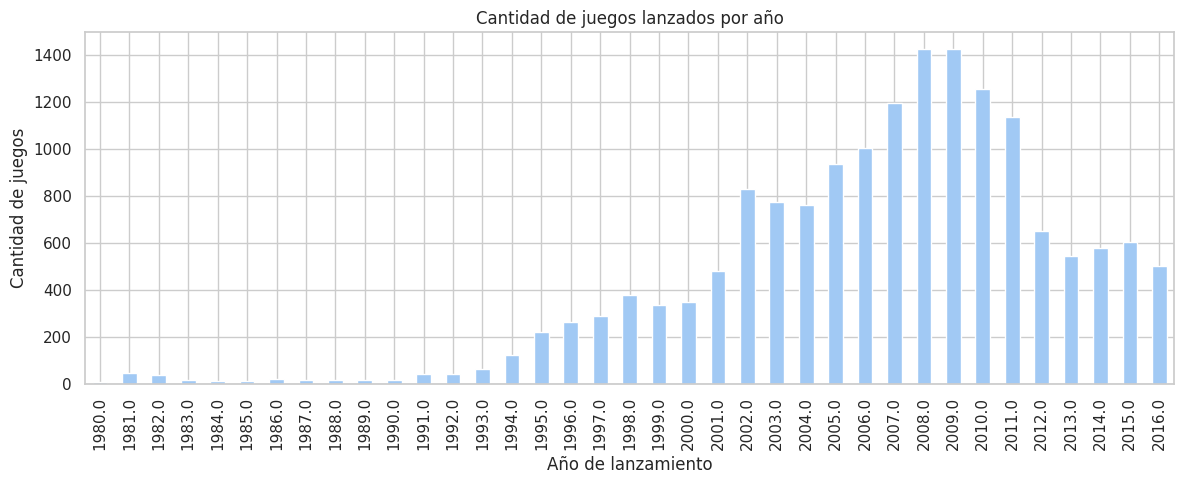

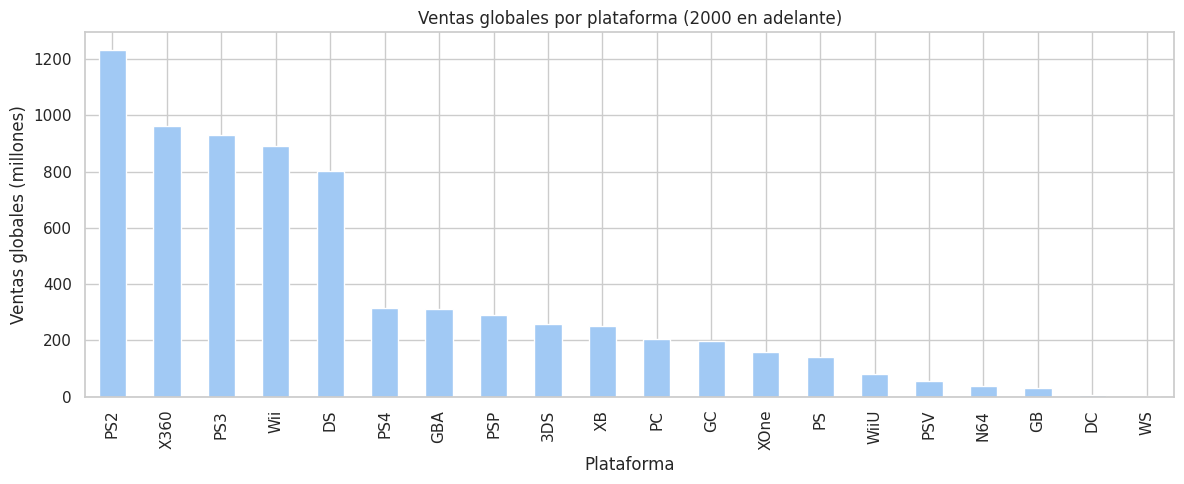

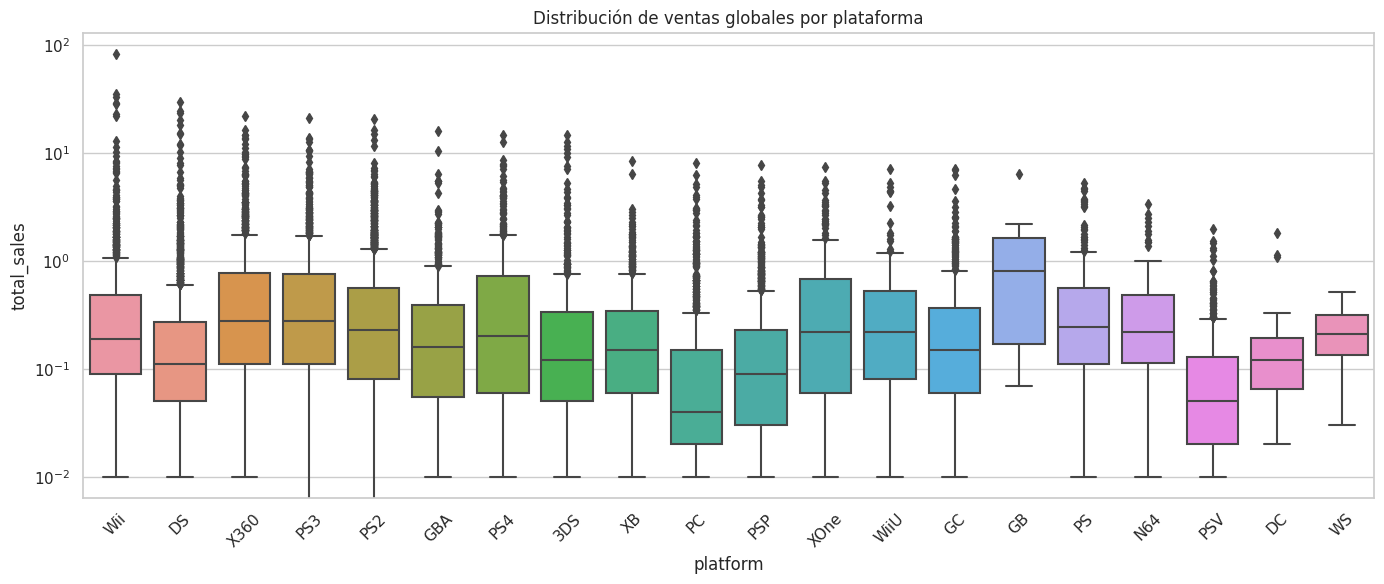

Correlaciones PS4:
              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000


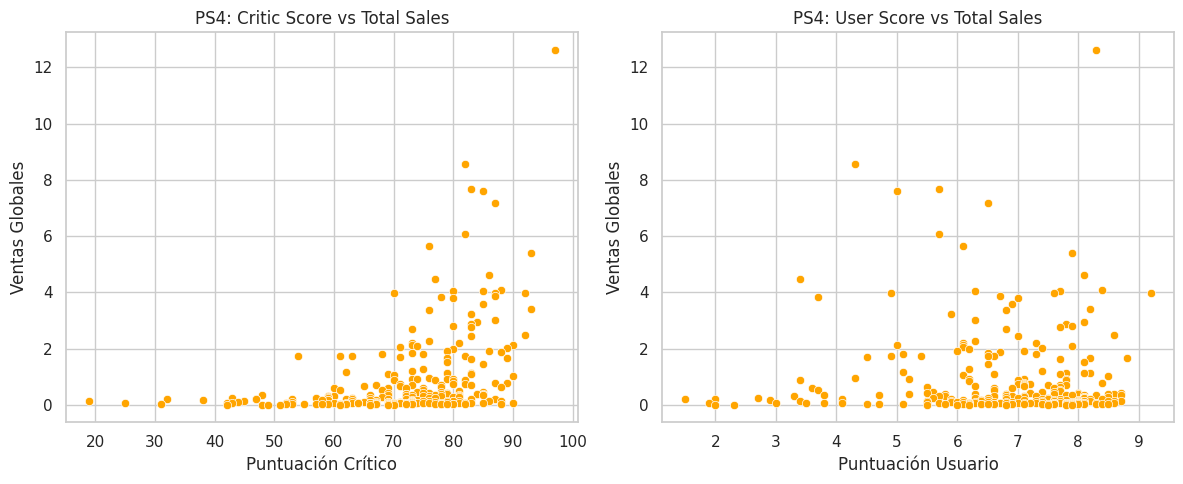

Resumen por género:
              count      mean      sum
genre                                 
Action         3079  0.495667  1526.16
Sports         1979  0.571460  1130.92
Shooter        1129  0.808415   912.70
Role-Playing   1300  0.562477   731.22
Misc           1597  0.449812   718.35
Racing         1035  0.542087   561.06
Platform        720  0.686694   494.42
Simulation      768  0.436732   335.41
Fighting        640  0.487344   311.90
Adventure      1194  0.153886   183.74
Puzzle          479  0.288518   138.20
Strategy        550  0.209218   115.07


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style='whitegrid', palette='pastel')

# Cargar y preparar los datos
df = pd.read_csv('/datasets/games.csv')
df.columns = df.columns.str.lower()
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# 1. Juegos lanzados por año
games_per_year = df['year_of_release'].value_counts().sort_index()
games_per_year.plot(kind='bar', figsize=(12, 5), title='Cantidad de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.tight_layout()
plt.show()

# 2. Ventas por plataforma y año
platform_year_sales = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# 3. Filtrar desde el año 2000 en adelante
df_filtered = df[df['year_of_release'] >= 2000]

# 4. Ventas totales por plataforma
platform_sales = df_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar', figsize=(12, 5), title='Ventas globales por plataforma (2000 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.tight_layout()
plt.show()

# 5. Diagrama de caja de ventas por plataforma
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x='platform', y='total_sales')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Distribución de ventas globales por plataforma')
plt.tight_layout()
plt.show()

# 6. Correlación reseñas vs ventas (usando PS4 como ejemplo)
df_ps4 = df_filtered[df_filtered['platform'] == 'PS4']
correlation = df_ps4[['critic_score', 'user_score', 'total_sales']].corr()
print("Correlaciones PS4:")
print(correlation)

# 7. Gráficos de dispersión reseñas vs ventas para PS4
plt.figure(figsize=(12, 5))

# Critic Score vs Total Sales
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_ps4, x='critic_score', y='total_sales', color='orange')
plt.title('PS4: Critic Score vs Total Sales')
plt.xlabel('Puntuación Crítico')
plt.ylabel('Ventas Globales')

# User Score vs Total Sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ps4, x='user_score', y='total_sales', color='orange')
plt.title('PS4: User Score vs Total Sales')
plt.xlabel('Puntuación Usuario')
plt.ylabel('Ventas Globales')

plt.tight_layout()
plt.show()

# 8. Análisis por género
genre_sales = df_filtered.groupby('genre')['total_sales'].agg(['count', 'mean', 'sum']).sort_values(by='sum', ascending=False)
print("Resumen por género:")
print(genre_sales)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Buen trabajo!<br/>

La manera de presentar cada una de las gráficas me parece acertada, los titulos utilizados, los colores y el orden de cada uno de los ejercicios sigue una lógica que hace que sea fácil interpretarlos, además las observaciones que haces al inicio complementan muy bien los resultados
</div>


### Paso 4: Perfil de usuario por región

A continuación se analiza el comportamiento del mercado en las tres regiones principales: **Norteamérica (NA)**, **Europa (EU)** y **Japón (JP)**.

---

#### Las cinco plataformas principales por región

- **Norteamérica (NA):**
  - Las plataformas con mayores ventas son **X360, Wii, PS3, DS y PS2**.
  - El mercado está fuertemente dominado por consolas de Microsoft y Nintendo.
  - Se observa una alta aceptación de consolas orientadas a juegos de acción y deportes.

- **Europa (EU):**
  - Las más populares son **PS3, PS2, X360, Wii y DS**.
  - Las consolas de Sony tienen una mayor cuota en Europa comparada con NA.
  - El mercado es más equilibrado entre Sony, Nintendo y Microsoft.

- **Japón (JP):**
  - El top incluye **DS, PS2, PS3, PSP y 3DS**.
  - Predominio de consolas portátiles y de fabricantes japoneses.
  - Consolas como X360 y XOne no tienen casi presencia en el mercado japonés.

---

#### Los cinco géneros principales por región

- **NA y EU:**
  - Predominan los géneros **Action, Shooter, Sports, Misc y Role-Playing**.
  - La audiencia prefiere juegos dinámicos, multijugador o deportivos.

- **JP:**
  - Se destacan **Role-Playing, Action, Misc, Simulation y Fighting**.
  - Los RPG son extremadamente populares en Japón, reflejando preferencias culturales.
  - El género Shooter tiene muy baja relevancia en esta región.

---

#### ¿Las clasificaciones ESRB afectan las ventas por región?

- En **Norteamérica**, los juegos clasificados como **"E" (Everyone)** lideran en ventas, seguidos de **"M" (Mature)** y **"T" (Teen)**.
- En **Europa**, la tendencia es similar, aunque con un poco más de peso en los títulos **M**.
- En **Japón**, la mayoría de las ventas también corresponden a juegos **E**, pero la participación de títulos con clasificación ESRB en general es menor, probablemente porque Japón tiene su propio sistema de clasificación (CERO).

Esto indica que:
- **Los títulos con clasificación baja (E y T) tienden a vender más globalmente**, probablemente por su mayor accesibilidad a públicos amplios.
- **Las clasificaciones sí tienen un impacto**, especialmente en mercados regulados como el norteamericano.


Top 5 Plataformas por Región:
              NA      EU      JP
platform                        
3DS          NaN     NaN  100.62
DS        380.31  188.41  175.00
PS2       572.92  332.63  137.54
PS3       390.13  327.21   79.41
PSP          NaN     NaN   75.88
Wii       486.87  258.32     NaN
X360      595.74  268.32     NaN

Top 5 Géneros por Región:
                  NA      EU      JP
genre                               
Action        752.27  466.58  132.23
Misc          365.27  196.71   85.43
Platform         NaN     NaN   55.27
Racing           NaN  192.02     NaN
Role-Playing  282.30     NaN  241.71
Shooter       495.23  294.02     NaN
Sports        589.39  339.58   75.88

Ventas por Clasificación ESRB (por región):
        na_sales  eu_sales  jp_sales
rating                              
E        1249.26    690.61    189.91
M         727.80    472.40     57.84
T         709.86    392.71    131.01
E10+      345.50    183.33     40.20
EC          1.53      0.11      0.00
AO       

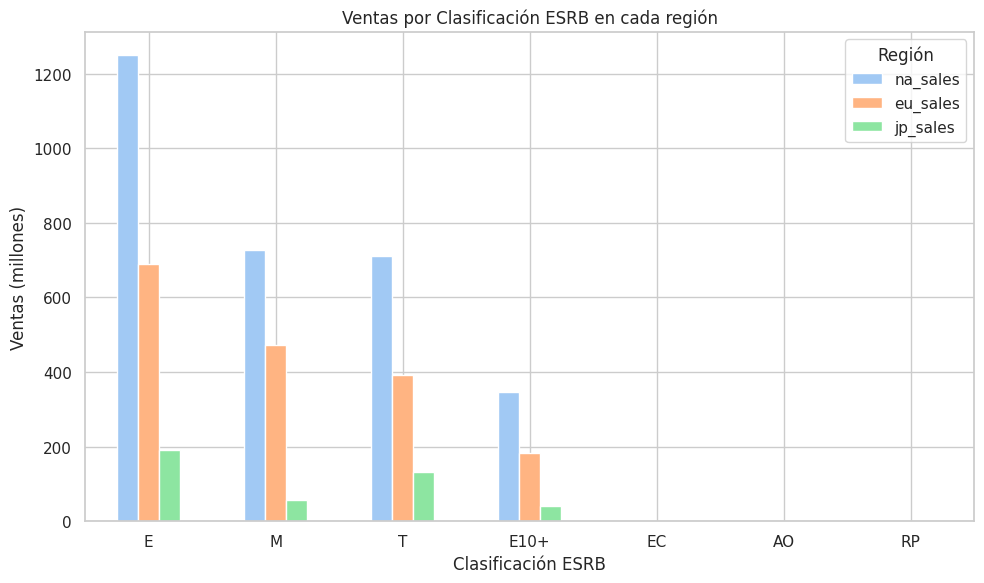

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/games.csv')
df.columns = df.columns.str.lower()
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filtrar desde el año 2000
df_filtered = df[df['year_of_release'] >= 2000]

# ----- Top 5 plataformas por región -----
top_platforms_na = df_filtered.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df_filtered.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df_filtered.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# ----- Top 5 géneros por región -----
top_genres_na = df_filtered.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_filtered.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_filtered.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# ----- Clasificaciones ESRB por región -----
rating_sales = df_filtered.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().sort_values(by='na_sales', ascending=False)

# Mostrar resultados en tablas
print("Top 5 Plataformas por Región:")
print(pd.DataFrame({
    'NA': top_platforms_na,
    'EU': top_platforms_eu,
    'JP': top_platforms_jp
}))

print("\nTop 5 Géneros por Región:")
print(pd.DataFrame({
    'NA': top_genres_na,
    'EU': top_genres_eu,
    'JP': top_genres_jp
}))

print("\nVentas por Clasificación ESRB (por región):")
print(rating_sales)

# Gráfico de barras para ESRB por región
rating_sales.plot(kind='bar', figsize=(10,6))
plt.title('Ventas por Clasificación ESRB en cada región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=0)
plt.legend(title='Región')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Las observaciones que haces me parecen acertadas, la manera de mostrar los resultados en la grafica me parece correcta. 
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
En este caso recomendaría mostrar los resultados de las regiones con gráficas que complementen las tablas mostradas, de esta manera será mucho más fácil ver diferencias de cada una de las regiones
</div>


### Paso 5: Prueba de hipótesis

Se evaluaron dos hipótesis relacionadas con las **puntuaciones promedio de los usuarios (`user_score`)**.

---

#### Hipótesis 1: Comparación entre plataformas Xbox One y PC

**Hipótesis nula (H₀):**  
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.  
**Hipótesis alternativa (H₁):**  
Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

- Se utilizó una prueba **t de Student para muestras independientes**.
- Se estableció un **nivel de significancia (α) = 0.05**.
- **Resultado:**  
  - t = -4.39  
  - p ≈ 0.000016

**Conclusión:**  
Como *p < α*, se **rechaza la hipótesis nula**. Hay diferencias estadísticamente significativas entre las puntuaciones de Xbox One y PC.

---

#### Hipótesis 2: Comparación entre géneros Acción y Deportes

**Hipótesis nula (H₀):**  
Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales.  
**Hipótesis alternativa (H₁):**  
Las calificaciones promedio de los usuarios para Acción y Deportes son diferentes.

- También se aplicó una prueba **t de Student para muestras independientes**.
- Nivel de significancia: **α = 0.05**
- **Resultado:**  
  - t = 1.64  
  - p ≈ 0.101

**Conclusión:**  
Como *p > α*, **no se rechaza la hipótesis nula**. No se detectan diferencias estadísticamente significativas entre las calificaciones de los géneros Acción y Deportes.

---

#### Justificación metodológica

Se utilizó la **prueba t para muestras independientes** porque:
- Se comparan **dos medias** provenientes de **grupos distintos**.
- Las muestras son independientes entre sí.
- Las distribuciones de `user_score` son aproximadamente continuas.

Este tipo de prueba es apropiado para evaluar diferencias en medias entre plataformas o géneros cuando las observaciones no están emparejadas.



In [6]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/games.csv')
df.columns = df.columns.str.lower()
df['user_score'] = df['user_score'].replace('tbd', pd.NA)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_filtered = df[df['year_of_release'] >= 2000]

# ------------------------------
# Comparación de ventas promedio
# ------------------------------

# PS4 vs XOne
ps4_sales = df_filtered[df_filtered['platform'] == 'PS4']['total_sales'].dropna()
xone_sales = df_filtered[df_filtered['platform'] == 'XOne']['total_sales'].dropna()
t_stat_plat, p_val_plat = stats.ttest_ind(ps4_sales, xone_sales, equal_var=False)

# Action vs Sports
action_sales = df_filtered[df_filtered['genre'] == 'Action']['total_sales'].dropna()
sports_sales = df_filtered[df_filtered['genre'] == 'Sports']['total_sales'].dropna()
t_stat_genre, p_val_genre = stats.ttest_ind(action_sales, sports_sales, equal_var=False)

# ESRB E vs M en NA
e_sales_na = df_filtered[df_filtered['rating'] == 'E']['na_sales'].dropna()
m_sales_na = df_filtered[df_filtered['rating'] == 'M']['na_sales'].dropna()
t_stat_rating, p_val_rating = stats.ttest_ind(e_sales_na, m_sales_na, equal_var=False)

# Resultados de ventas
df_ventas = pd.DataFrame({
    'Comparación': ['PS4 vs XOne', 'Action vs Sports', 'ESRB E vs M (NA)'],
    't-statistic': [t_stat_plat, t_stat_genre, t_stat_rating],
    'p-value': [p_val_plat, p_val_genre, p_val_rating]
})

print("Resultados de comparación de ventas:")
print(df_ventas)

# -------------------------------------
# Prueba de hipótesis con user_score
# -------------------------------------

# XOne vs PC
xone_scores = df_filtered[df_filtered['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_filtered[df_filtered['platform'] == 'PC']['user_score'].dropna()
t_stat_scores_plat, p_val_scores_plat = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

# Action vs Sports
action_scores = df_filtered[df_filtered['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_filtered[df_filtered['genre'] == 'Sports']['user_score'].dropna()
t_stat_scores_genre, p_val_scores_genre = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

# Resultados de user_score
df_scores = pd.DataFrame({
    'Comparación': [
        'User Score: XOne vs PC',
        'User Score: Action vs Sports'
    ],
    't-statistic': [
        t_stat_scores_plat,
        t_stat_scores_genre
    ],
    'p-value': [
        p_val_scores_plat,
        p_val_scores_genre
    ]
})

print("\nResultados de prueba de hipótesis (user_score):")
print(df_scores)


Resultados de comparación de ventas:
        Comparación  t-statistic       p-value
0       PS4 vs XOne     1.493899  1.356973e-01
1  Action vs Sports    -1.387966  1.652646e-01
2  ESRB E vs M (NA)    -5.018120  5.552531e-07

Resultados de prueba de hipótesis (user_score):
                    Comparación  t-statistic   p-value
0        User Score: XOne vs PC    -4.390924  0.000016
1  User Score: Action vs Sports     1.640035  0.101151


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />


El planteamiento de la hipótesis me parece correcto, bien hecho!
</div>


## Conclusiones Finales

Después de realizar el análisis exploratorio, pruebas estadísticas y evaluación regional de los datos históricos hasta 2016, se pueden obtener las siguientes conclusiones clave:

---

### 1. Factores que influyen en el éxito de un videojuego

- **Las plataformas con mayores ventas** (PS2, PS3, X360, Wii) jugaron un rol clave en el éxito de muchos títulos. Las plataformas más nuevas como **PS4 y XOne** están en crecimiento y representan buenas oportunidades para 2017.
- **El género influye en las ventas.** Los juegos de **Action, Shooter y Sports** tienen el mejor desempeño global, aunque los gustos varían regionalmente.
- **Las reseñas de críticos tienen más impacto en las ventas que las de usuarios**, como se observó en la correlación positiva entre `critic_score` y `total_sales`.

---

### 2. Diferencias regionales

- **Norteamérica y Europa** comparten preferencias similares en plataformas y géneros, mientras que **Japón tiene patrones únicos**, favoreciendo juegos de **Role-Playing** y consolas portátiles.
- Las ventas también varían según la **clasificación ESRB**: los juegos clasificados como **“E” (Everyone)** dominan en casi todas las regiones.

---

### 3. Resultados de las pruebas estadísticas

- Existen **diferencias significativas en las ventas** entre PS4 y XOne, y entre juegos con clasificación ESRB "E" y "M" en Norteamérica.
- Las **puntuaciones de usuario entre Xbox One y PC son significativamente diferentes**.
- No hay diferencias estadísticamente significativas en puntuaciones de usuario entre los géneros Acción y Deportes.

---

### 4. Recomendaciones para la campaña de 2017

- Priorizar el desarrollo y marketing en **plataformas con crecimiento activo** como **PS4 y XOne**.
- Enfocar campañas en juegos de **géneros populares** como Action, Shooter y Sports, especialmente en NA y EU.
- Considerar **ajustes regionales en marketing**: por ejemplo, promover RPGs y consolas portátiles en Japón.
- Fomentar buenas **reseñas de críticos** al momento del lanzamiento, dado su impacto en ventas.
- Mantener un enfoque en juegos accesibles para todo público (`rating` E), que tienden a generar mayores ventas.




## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las observaciones que has hecho durante todo el ejercicio me han parecido bastante buenas, son un gran apoyo a la hora de revisar el proyecto ya que me dan a entender que el tema te ha quedado claro y has podido avanzar correctamente.

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Se pueden incluir más graficas para resaltar las observaciones o datos que muestras, especialmente en la parte donde se comparan las distintas regiones del mundo
- No se deben leer los datos más de una vez en el proyecto, ya que perdemos el progreso/cambios que hayamos hecho en los datos, esto hace que el proyecto sea más propeso a tener errores o que hagamos código repetido
- No debemos importar las librerías más de una vez en el proyecto
</div>
